In [1]:
! pip install imblearn

import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime as dt
import statsmodels.formula.api as sm
import warnings 

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [2]:
! pip install imblearn

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,5

In [4]:
warnings.filterwarnings('ignore')

# Description of Variables

- Age: The age of the employee. (Numerical)
- Attrition: Whether or not the employee has left the organization. (Categorical)
- BusinessTravel: The frequency of business travel for the employee. (Categorical)
- DailyRate: The daily rate of pay for the employee. (Numerical)
- Department: The department the employee works in. (Categorical)
- DistanceFromHome: The distance from home in miles for the employee. (Numerical)
- Education: The level of education achieved by the employee. (Categorical)
- EducationField: The field of study for the employee's education. (Categorical)
- EmployeeCount: The total number of employees in the organization. (Numerical)
- EmployeeNumber: A unique identifier for each employee profile. (Numerical)
- EnvironmentSatisfaction: The employee's satisfaction with their work environment. (Categorical)
- Gender: The gender of the employee. (Categorical)
- HourlyRate: The hourly rate of pay for the employee. (Numerical)
- JobInvolvement: The level of involvement required for the employee's job. (Categorical)
- JobLevel: The job level of the employee. (Categorical)
- JobRole: The role of the employee in the organization. (Categorical)
- JobSatisfaction: The employee's satisfaction with their job. (Categorical)
- MaritalStatus: The marital status of the employee. (Categorical)
- MonthlyIncome: The monthly income of the employee. (Numerical)
- MonthlyRate: The monthly rate of pay for the employee. (Numerical)
- NumCompaniesWorked: The number of companies the employee has worked for. (Numerical)
- Over18: Whether or not the employee is over 18. (Categorical)
- OverTime: Whether or not the employee works overtime. (Categorical)
- PercentSalaryHike: The percentage of salary hike for the employee. (Numerical)
- PerformanceRating: The performance rating of the employee. (Categorical)
- RelationshipSatisfaction: The employee's satisfaction with their relationships. (Categorical)
- StandardHours: The standard hours of work for the employee. (Numerical)
- StockOptionLevel: The stock option level of the employee. (Numerical)
- TotalWorkingYears: The total number of years the employee has worked. (Numerical)
- TrainingTimesLastYear: The number of times the employee was taken for training in the last year. (Numerical)
- WorkLifeBalance: The employee's perception of their work-life balance. (Categorical)
- YearsAtCompany: The number of years the employee has been with the company. (Numerical)
- YearsInCurrentRole: The number of years the employee has been in their current role. (Numerical)
- YearsSinceLastPromotion: The number of years since the employee's last promotion. (Numerical)
- YearsWithCurrManager: The number of years the employee has been with their current manager. (Numerical)

- make people who leave the job 1 (bc there are far less of them)
- min false neg rate to maximizew recall 
- precision recall is a good metric to optimize (most imp recall)
- minimize ppl who will leave

In [5]:
df=pd.read_csv("data/HR_Analytics.csv")

In [6]:
#Load data
df=pd.read_csv("data/HR_Analytics.csv")
df = pd.get_dummies(df, columns = ["Attrition"])
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,0,8,0,1,6,4,0,5,0,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,1,10,3,3,10,7,1,7,1,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,0,7,3,3,0,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,0,8,3,3,8,7,3,0,1,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,1,6,3,3,2,2,2,2,1,0


In [7]:
#Keep the dummy column where employees leaving = 1, because there are far less of them and we want to minimize FNR and recall
df = df.drop(["Attrition_No"], axis = 1)

In [8]:
#Splitting up data into train and test data - train has 70% of values and test has 30%
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, random_state=25)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 1029
No. of testing examples: 441


In [9]:
#Printing the ratio of No's and Yes's to the response variable (Attrition) for train and test to make sure they are similar
print(train.Attrition_Yes.value_counts()[1]/train.Attrition_Yes.value_counts()[0])
print(test.Attrition_Yes.value_counts()[1]/test.Attrition_Yes.value_counts()[0])

0.1937354988399072
0.18867924528301888


In [10]:
#Shape of data
print(train.shape)
print(test.shape)

(1029, 35)
(441, 35)


In [11]:
#There are zero missing values that need to be filled in either data set
print(train.isna().sum())
print(test.isna().sum())

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [12]:
#All column names in dataframe
train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_Yes'],
      dtype='object')

In [13]:
#Finding correlations between variables and response
train.corrwith(train.Attrition_Yes).sort_values(ascending = False)

Attrition_Yes               1.000000
DistanceFromHome            0.065658
NumCompaniesWorked          0.029205
MonthlyRate                 0.001126
PerformanceRating          -0.007033
EmployeeNumber             -0.020580
PercentSalaryHike          -0.021023
TrainingTimesLastYear      -0.036240
WorkLifeBalance            -0.039167
Education                  -0.042102
HourlyRate                 -0.044921
YearsSinceLastPromotion    -0.048035
RelationshipSatisfaction   -0.061508
DailyRate                  -0.081930
JobSatisfaction            -0.098817
EnvironmentSatisfaction    -0.113397
JobInvolvement             -0.121431
StockOptionLevel           -0.145659
YearsAtCompany             -0.150960
YearsWithCurrManager       -0.153679
MonthlyIncome              -0.164937
JobLevel                   -0.169904
YearsInCurrentRole         -0.178133
Age                        -0.182642
TotalWorkingYears          -0.185703
EmployeeCount                    NaN
StandardHours                    NaN
d

In [14]:
train.Over18.value_counts()

Y    1029
Name: Over18, dtype: int64

In [15]:
#Drop employee count, over 18 and standard hours because they are the same value for every person
train = train.drop(["EmployeeCount", "StandardHours", "Over18"], axis = 1)
test = test.drop(["EmployeeCount", "StandardHours", "Over18"], axis = 1)
train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes'],
      dtype='object')

# Visualizations of initial thoughts on variables that could be correlated

In [16]:
# calculate the null count for each column
null_count = df.isnull().sum()
null_count.name = 'count of null' 

# find the datatype for each column
dtype = df.dtypes
dtype.name = 'data type'

# describe the dataframe to get other statistics
data_desc = df.describe(include='all', datetime_is_numeric=True)

# remove count, freq, mean, std, 25%, 50%, and 75% percentiles
data_desc = data_desc.drop(['count', 'freq', 'std', '25%', '75%', 'top'], axis=0)

# transpose the dataframe to prevent the dataframe from being too wide.
data_desc_T = data_desc.T

# add the row of null count and datatype to the dataframe
data_desc_T = pd.concat([dtype, null_count, data_desc_T], axis=1)

# order the summary statistics table by datatype and count of null
data_desc_T = data_desc_T.sort_values(['data type', 'count of null'])

# show the summary statistics table
data_desc_T

,data type,count of null,unique,mean,min,50%,max
Attrition_Yes,uint8,0,NaN,0.161224,0.0,0.0,1.0
Age,int64,0,NaN,36.92381,18.0,36.0,60.0
DailyRate,int64,0,NaN,802.485714,102.0,802.0,1499.0
DistanceFromHome,int64,0,NaN,9.192517,1.0,7.0,29.0
Education,int64,0,NaN,2.912925,1.0,3.0,5.0
EmployeeCount,int64,0,NaN,1.0,1.0,1.0,1.0
EmployeeNumber,int64,0,NaN,1024.865306,1.0,1020.5,2068.0
EnvironmentSatisfaction,int64,0,NaN,2.721769,1.0,3.0,4.0
HourlyRate,int64,0,NaN,65.891156,30.0,66.0,100.0
JobInvolvement,int64,0,NaN,2.729932,1.0,3.0,4.0


In [17]:
df = df.drop(columns = ['Over18','StandardHours','EmployeeCount'])
# We should just drop these columns because they only have 1 unique values and contain no information

<AxesSubplot:>

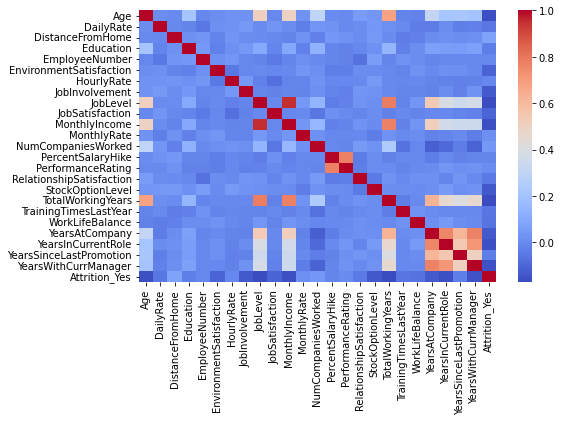

In [18]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')

In [19]:
# count the number of attrition entries
attrition_counts = df['Attrition_Yes'].value_counts()

# calculate the percentage out of total entries
attrition_percent = attrition_counts/attrition_counts.sum()

# make labels for plots
labels = ['Attrition_No-'+str((attrition_percent[0]*100).round(2))+'%', 'Attrition_Yes-'+str((attrition_percent[1]*100).round(2))+'%']

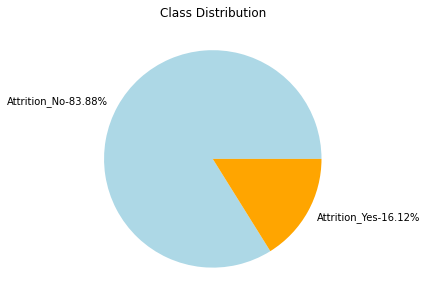

In [20]:
# check for class imbalance of the outcome variable
plt.pie(attrition_counts, labels=labels, colors=['lightblue', 'orange'])
plt.title('Class Distribution')
plt.show()

class imbalance in the outcome variable, maybe do resampling techniques: This involves either oversampling the minority class by duplicating existing examples or undersampling the majority class by reducing the number of examples. Common resampling techniques include random oversampling, random undersampling, and Synthetic Minority Over-sampling Technique (SMOTE). Do this before training the model

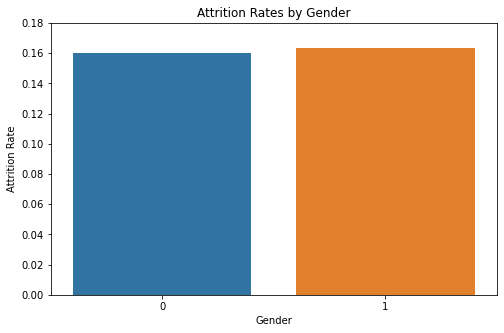

In [21]:
#percentage of people who stay/leave by gender
gender_data = train.groupby('Gender')['Attrition_Yes'].agg([("attrition_rate", "mean"), ("count", "count")]).reset_index(drop = False)
gender_data
# Bar plot of gender vs. attrition
sns.barplot(x=gender_data.index, y=gender_data.attrition_rate)
plt.title('Attrition Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Attrition Rate')
plt.ylim((0, 0.18))
plt.show()

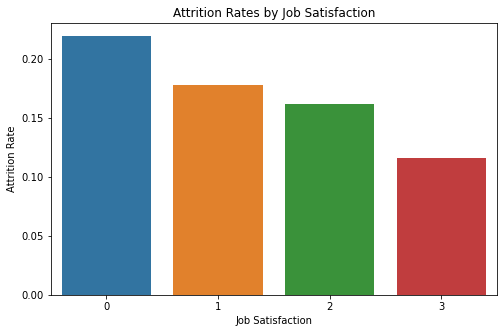

In [22]:
#percentage of people who stay/leave by job satisfaction
satisfaction_data = train.groupby('JobSatisfaction')['Attrition_Yes'].agg([("attrition_rate", "mean"), ("count", "count")]).reset_index(drop = False)
satisfaction_data
# Bar plot of gender vs. attrition
sns.barplot(x=satisfaction_data.index, y=satisfaction_data.attrition_rate)
plt.title('Attrition Rates by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Attrition Rate')
plt.show()

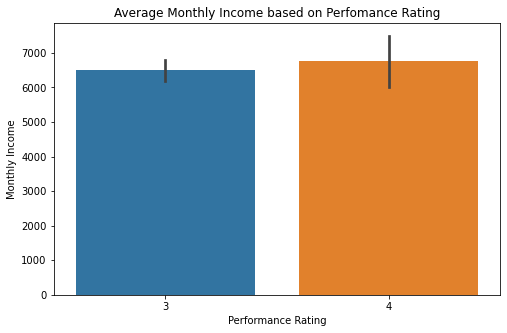

In [23]:
# Bar plot of gender vs. attrition
sns.barplot(x=train.PerformanceRating, y=train.MonthlyIncome)
plt.title('Average Monthly Income based on Perfomance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Monthly Income')
plt.show()

## END OF CATHERINE'S WORK - Continue working on visualizations of variables to see what may influence attrition rate/what could be interaction terms

<AxesSubplot:xlabel='Attrition_Yes', ylabel='MonthlyIncome'>

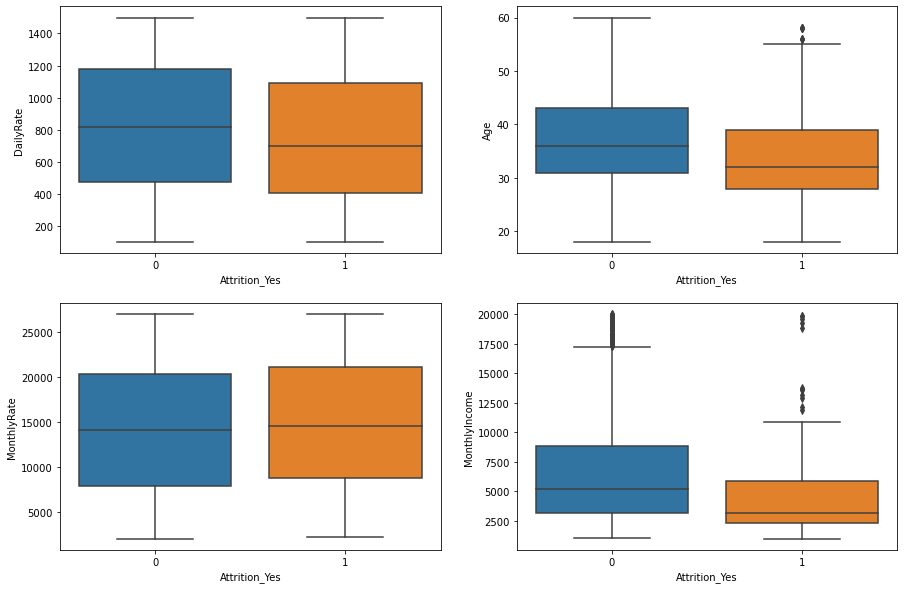

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.boxplot(data=df, x='Attrition_Yes', y='DailyRate', ax=axes[0, 0])
sns.boxplot(data=df, x='Attrition_Yes', y='Age', ax=axes[0, 1])
sns.boxplot(data=df, x='Attrition_Yes', y='MonthlyRate', ax=axes[1, 0])
sns.boxplot(data=df, x='Attrition_Yes', y='MonthlyIncome', ax=axes[1, 1])

In [25]:
df['Count']=1

In [26]:
#Binning MonthlyIncome
binned_income = pd.qcut(df['MonthlyIncome'],11,retbins=True)
#Finding percentage of fraud cases in each bin
income_data = df.groupby(binned_income[0])['Attrition_Yes'].agg([('Attrition_Yes','mean'),('Count','count')]).reset_index(drop=False)
income_data

,MonthlyIncome,Attrition_Yes,Count
0,"(1008.999, 2289.545]",0.305970,134
1,"(2289.545, 2622.273]",0.328358,134
2,"(2622.273, 3049.909]",0.218045,133
3,"(3049.909, 3957.364]",0.164179,134
4,"(3957.364, 4588.273]",0.112782,133
5,"(4588.273, 5301.818]",0.104478,134
6,"(5301.818, 6197.182]",0.135338,133
7,"(6197.182, 7640.091]",0.089552,134
8,"(7640.091, 10273.273]",0.157895,133
9,"(10273.273, 14831.273]",0.119403,134


Text(0.5, 0, 'income_bin')

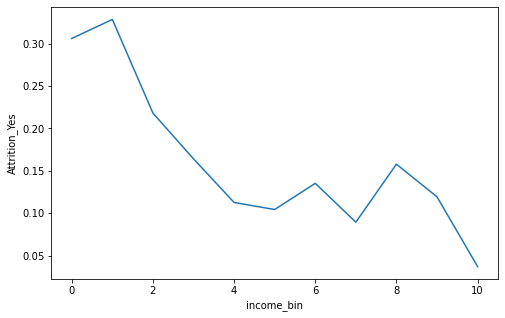

In [27]:
#Visualizing percentage of attrition with increasing monthly income
sns.lineplot(x = income_data.index, y= income_data['Attrition_Yes'])
plt.xlabel('income_bin')

In [28]:
#Binning MonthlyIncome
binned_age = pd.qcut(df['Age'],11,retbins=True)
#Finding percentage of fraud cases in each bin
age_data = df.groupby(binned_age[0])['Attrition_Yes'].agg([('Attrition_Yes','mean'),('Count','count')]).reset_index(drop=False)
age_data

,Age,Attrition_Yes,Count
0,"(17.999, 26.0]",0.345679,162
1,"(26.0, 29.0]",0.213415,164
2,"(29.0, 31.0]",0.209302,129
3,"(31.0, 33.0]",0.193277,119
4,"(33.0, 35.0]",0.122581,155
5,"(35.0, 37.0]",0.100840,119
6,"(37.0, 39.0]",0.080000,100
7,"(39.0, 42.0]",0.090909,143
8,"(42.0, 46.0]",0.100719,139
9,"(46.0, 51.0]",0.120690,116


Text(0.5, 0, 'age_bin')

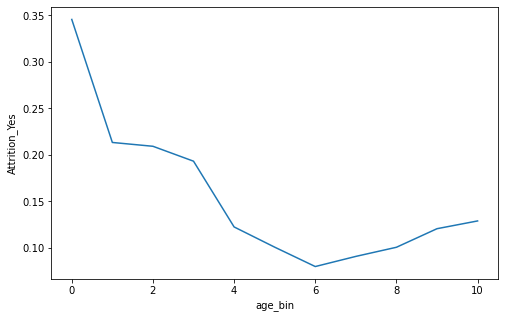

In [29]:
#Visualizing percentage of attrition with increasing monthly income
sns.lineplot(x = age_data.index, y= age_data['Attrition_Yes'])
plt.xlabel('age_bin')

In [30]:
"""
sns.scatterplot(x = train_num.Attrition, y = train_num.MonthlyIncome, color = 'orange')
plt.xlabel('Attrition')
plt.ylabel('MonthlyIncome')
"""

"\nsns.scatterplot(x = train_num.Attrition, y = train_num.MonthlyIncome, color = 'orange')\nplt.xlabel('Attrition')\nplt.ylabel('MonthlyIncome')\n"

In [31]:
"""
ols_object = smf.ols(formula = 'Attrition~DailyRate + Age + MonthlyIncome', data = train_num)
model = ols_object.fit()
model.summary()

#This is wrong. it's for linear regression not logistic regression
"""

"\nols_object = smf.ols(formula = 'Attrition~DailyRate + Age + MonthlyIncome', data = train_num)\nmodel = ols_object.fit()\nmodel.summary()\n\n#This is wrong. it's for linear regression not logistic regression\n"

In machine learning, having a class imbalance problem can lead to biased models and poor predictive performance. If one class has significantly fewer examples than the other classes, the model may not learn enough from the minority class and may struggle to generalize well to new data.
In our case, having only 16% of Attrition = Yes suggests that our dataset has a significant class imbalance. This can lead to issues such as too many false negatives and reduced model performance overall.
To address this class imbalance problem, we chose to oversample the minority class, as shown in the code below.

In [32]:
# separate the target variable and predictor variables
X = df.drop(columns = ['Attrition_Yes','Count'], axis=1)
y = df['Attrition_Yes']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# perform oversampling on the training data
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# print the number of examples in each class before and after oversampling
print("Before oversampling:")
print(y_train.value_counts())
print("After oversampling:")
print(y_train_resampled.value_counts())

Before oversampling:
0    978
1    198
Name: Attrition_Yes, dtype: int64
After oversampling:
0    978
1    978
Name: Attrition_Yes, dtype: int64


In [33]:
y_train_resampled.name = 'Attrition_Yes'
train = pd.concat([X_train_resampled, pd.DataFrame(y_train_resampled)],axis =1)

In [34]:
column_list = X_train_resampled.columns.to_list()

In [35]:
formula = 'Attrition_Yes~'+'+'.join(column_list)

In [36]:
column_list

['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [37]:
train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes
0,24,Travel_Rarely,350,Research & Development,21,2,Technical Degree,1551,3,Male,...,2,3,2,3,3,1,1,0,0,0
1,18,Non-Travel,287,Research & Development,5,2,Life Sciences,1012,2,Male,...,4,0,0,2,3,0,0,0,0,0
2,29,Travel_Rarely,1247,Sales,20,2,Marketing,349,4,Male,...,4,1,10,2,3,3,2,0,2,0
3,39,Travel_Rarely,492,Research & Development,12,3,Medical,1654,4,Male,...,3,0,7,3,3,5,4,1,0,0
4,31,Travel_Rarely,311,Research & Development,20,3,Life Sciences,1881,2,Male,...,1,1,10,2,3,10,8,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,30,Travel_Frequently,464,Research & Development,4,3,Technical Degree,514,3,Male,...,3,0,3,4,3,1,0,0,0,1
1952,21,Travel_Rarely,156,Sales,12,3,Life Sciences,494,3,Female,...,4,0,1,0,3,1,0,0,0,1
1953,41,Travel_Rarely,1356,Sales,20,2,Marketing,248,2,Female,...,4,0,4,5,2,4,3,0,2,1
1954,23,Travel_Rarely,1243,Research & Development,6,3,Life Sciences,811,3,Male,...,3,2,1,2,3,0,0,0,0,1


In [38]:
model = smf.logit(formula=formula, data=train).fit()
model.summary()

         Current function value: 0.426895
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1956
Model:                          Logit   Df Residuals:                     1910
Method:                           MLE   Df Model:                           45
Date:                Thu, 02 Mar 2023   Pseudo R-squ.:                  0.3841
Time:                        12:33:47   Log-Likelihood:                -835.01
converged:                      False   LL-Null:                       -1355.8
Covariance Type:            nonrobust   LLR p-value:                7.479e-189
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              -10.8431    209.034     -0.052      0.959    -420.542     398.856
BusinessTravel[T.Travel_Frequently]      1.8105      0.286      6.333      0.000       1.250       2.371
BusinessTravel[T.Travel_Rarely]          1.1005      0.261      4.223      0.000       0.590       1.611
Department[T.Research & Development]    12.9215    209.030      0.062      0.951    -396.771     422.614
Department[T.Sales]                     13.4041    209.031      0.064      0.949    -396.288     423.097
EducationField[T.Life Sciences]         -1.2724      0.568     -2.239      0.025      -2.386      -0.159
EducationField[T.Marketing]             -1.1581      0.614     -1.885      0.059      -2.362       0.046
EducationField[T.Medical]               -0.9597      0.563     -1.705      0.088      -2.063       0.143
EducationField[T.Other]                 -0.5149      0.606     -0.849      0.396      -1.704       0.674
EducationField[T.Technical Degree]       0.4617      0.586      0.788      0.431      -0.687       1.611
Gender[T.Male]                           0.4764      0.131      3.633      0.000       0.219       0.733
JobRole[T.Human Resources]              14.7960    209.031      0.071      0.944    -394.897     424.489
JobRole[T.Laboratory Technician]         2.3865      0.346      6.894      0.000       1.708       3.065
JobRole[T.Manager]                      -0.0570      0.626     -0.091      0.927      -1.284       1.170
JobRole[T.Manufacturing Director]        0.9077      0.357      2.540      0.011       0.207       1.608
JobRole[T.Research Director]            -1.1267      0.620     -1.816      0.069      -2.342       0.089
JobRole[T.Research Scientist]            1.1633      0.346      3.364      0.001       0.486       1.841
JobRole[T.Sales Executive]               1.0189      0.742      1.373      0.170      -0.436       2.474
JobRole[T.Sales Representative]          2.4418      0.790      3.090      0.002       0.893       3.991
MaritalStatus[T.Married]                 0.8121      0.190      4.270      0.000       0.439       1.185
MaritalStatus[T.Single]                  1.8014      0.245      7.350      0.000       1.321       2.282
OverTime[T.Yes]                          2.0857      0.140     14.905      0.000       1.811       2.360
Age                                     -0.0191      0.009     -2.013      0.044      -0.038      -0.001
DailyRate                               -0.0002      0.000     -1.215      0.224      -0.001       0.000
DistanceFromHome                         0.0424      0.008      5.330      0.000       0.027       0.058
Education                                0.0356      0.062      0.573      0.566      -0.086       0.157
EmployeeNumber                       -2.723e-05      0.000     -0.253      0.800      -0.000       0.000
EnvironmentSatisfaction                 -0.3937      0.061     -6.457      0.000      -0.51

confusion matrix for this model. Call it baseline model. Then, do transformations from here using graphs for justification.

In [39]:
#train2_num.corrwith(train2_num.booking_status).sort_values(ascending = False)

In [40]:
"""

train_num.columns = train_num.columns.str.replace(' ', '_')
# Attrition = 1 if left org (if yes)
train_num['Attrition'] = train_num['Attrition'].apply(lambda x: 1 if x=='Yes' else 0) #1 if left org
# BusinessTravel = 3 if Travel_Frequently, 2 if Travel_Rarely, 1 if no travel
train_num['BusinessTravel'] = train_num['BusinessTravel'].apply(
    lambda x: 3 if x=='Travel_Frequently' else 2 if x == 'Travel_Rarely' else 1)
# Department = 3 for R&D, 2 for Sales, and 1 for HR
train_num['Department'] = train_num['Department'].apply(
    lambda x: 3 if x=='Research & Development' else 2 if x == 'Sales' else 1)
# different numbers assigned to every field, 1 = Human Resources
train_num['EducationField'] = train_num['EducationField'].apply(
    lambda x: 6 if x=='Life Sciences' else 5 if x == 'Medical' else 4 if x == 'Marketing' 
    else 3 if x == 'Technical Degree' else 2 if x == 'Other' else 1)
# Gender = 1 if male, 0 if female
train_num['Gender'] = train_num['Gender'].apply(lambda x: 1 if x=='Male' else 0)
# diff num for diff job roles, 1 = Human Resources
train_num['JobRole'] = train_num['JobRole'].apply(
    lambda x: 9 if x=='Sales Executive' else 8 if x == 'Research Scientist' else 7 if x == 'Laboratory Technician' 
    else 6 if x == 'Manufacturing Director' else 5 if x == 'Healthcare Representative' else 4 if x == 'Manager' 
    else 3 if x == 'Sales Representative' else 2 if x == 'Research Director' else 1)
# MaritalStatus = 1 if Divorced
train_num['MaritalStatus'] = train_num['MaritalStatus'].apply(
    lambda x: 3 if x=='Married' else 2 if x == 'Single' else 1)
# Over18 everyone is over 18
train_num['Over18'] = train_num['Over18'].apply(lambda x: 1 if x=='Y' else 0)
# OverTime = 1 if Yes, 0 if no
train_num['OverTime'] = train_num['OverTime'].apply(lambda x: 1 if x=='Yes' else 0) #1 if left org
train_num.head()
"""

"\n\ntrain_num.columns = train_num.columns.str.replace(' ', '_')\n# Attrition = 1 if left org (if yes)\ntrain_num['Attrition'] = train_num['Attrition'].apply(lambda x: 1 if x=='Yes' else 0) #1 if left org\n# BusinessTravel = 3 if Travel_Frequently, 2 if Travel_Rarely, 1 if no travel\ntrain_num['BusinessTravel'] = train_num['BusinessTravel'].apply(\n    lambda x: 3 if x=='Travel_Frequently' else 2 if x == 'Travel_Rarely' else 1)\n# Department = 3 for R&D, 2 for Sales, and 1 for HR\ntrain_num['Department'] = train_num['Department'].apply(\n    lambda x: 3 if x=='Research & Development' else 2 if x == 'Sales' else 1)\n# different numbers assigned to every field, 1 = Human Resources\ntrain_num['EducationField'] = train_num['EducationField'].apply(\n    lambda x: 6 if x=='Life Sciences' else 5 if x == 'Medical' else 4 if x == 'Marketing' \n    else 3 if x == 'Technical Degree' else 2 if x == 'Other' else 1)\n# Gender = 1 if male, 0 if female\ntrain_num['Gender'] = train_num['Gender'].apply(

ordinal, should not do this step^, assigning more value to different categories, would have to make dummy variables

In [41]:
train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_Yes'],
      dtype='object')

In [42]:
"""'Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']
 """

"'Age',\n 'BusinessTravel',\n 'DailyRate',\n 'Department',\n 'DistanceFromHome',\n 'Education',\n 'EducationField',\n 'EmployeeNumber',\n 'EnvironmentSatisfaction',\n 'Gender',\n 'HourlyRate',\n 'JobInvolvement',\n 'JobLevel',\n 'JobRole',\n 'JobSatisfaction',\n 'MaritalStatus',\n 'MonthlyIncome',\n 'MonthlyRate',\n 'NumCompaniesWorked',\n 'OverTime',\n 'PercentSalaryHike',\n 'PerformanceRating',\n 'RelationshipSatisfaction',\n 'StockOptionLevel',\n 'TotalWorkingYears',\n 'TrainingTimesLastYear',\n 'WorkLifeBalance',\n 'YearsAtCompany',\n 'YearsInCurrentRole',\n 'YearsSinceLastPromotion',\n 'YearsWithCurrManager']\n "

In [53]:
#Function to develop a model based on all predictors in predictor_subset
X = train.drop(["Attrition_Yes"], axis = 1)
X = X.rename(columns=lambda x: x.strip())


# diff num for diff job roles, 1 = Human Resources
X['JobRole'] = X['JobRole'].apply(
    lambda x: 9 if x=='Sales Executive' else 8 if x == 'Research Scientist' else 7 if x == 'Laboratory Technician' 
    else 6 if x == 'Manufacturing Director' else 5 if x == 'Healthcare Representative' else 4 if x == 'Manager' 
    else 3 if x == 'Sales Representative' else 2 if x == 'Research Director' else 1)
# BusinessTravel = 3 if Travel_Frequently, 2 if Travel_Rarely, 1 if no travel
X['BusinessTravel'] = X['BusinessTravel'].apply(
    lambda x: 3 if x=='Travel_Frequently' else 2 if x == 'Travel_Rarely' else 1)
# Department = 3 for R&D, 2 for Sales, and 1 for HR
X['Department'] = X['Department'].apply(
    lambda x: 3 if x=='Research & Development' else 2 if x == 'Sales' else 1)
# different numbers assigned to every field, 1 = Human Resources
X['EducationField'] = X['EducationField'].apply(
    lambda x: 6 if x=='Life Sciences' else 5 if x == 'Medical' else 4 if x == 'Marketing' 
    else 3 if x == 'Technical Degree' else 2 if x == 'Other' else 1)
# MaritalStatus = 1 if Divorced
X['MaritalStatus'] = X['MaritalStatus'].apply(
    lambda x: 3 if x=='Married' else 2 if x == 'Single' else 1)
X['Gender'] = X['Gender'].apply(lambda x: 1 if x=='Male' else 0)
# OverTime = 1 if Yes, 0 if no
X['OverTime'] = X['OverTime'].apply(lambda x: 1 if x=='Yes' else 0) #1 if left org

#trying to make train categorical
# diff num for diff job roles, 1 = Human Resources
train['JobRole'] = train['JobRole'].apply(
    lambda x: 9 if x=='Sales Executive' else 8 if x == 'Research Scientist' else 7 if x == 'Laboratory Technician' 
    else 6 if x == 'Manufacturing Director' else 5 if x == 'Healthcare Representative' else 4 if x == 'Manager' 
    else 3 if x == 'Sales Representative' else 2 if x == 'Research Director' else 1)
# BusinessTravel = 3 if Travel_Frequently, 2 if Travel_Rarely, 1 if no travel
train['BusinessTravel'] = train['BusinessTravel'].apply(
    lambda x: 3 if x=='Travel_Frequently' else 2 if x == 'Travel_Rarely' else 1)
# Department = 3 for R&D, 2 for Sales, and 1 for HR
train['Department'] = train['Department'].apply(
    lambda x: 3 if x=='Research & Development' else 2 if x == 'Sales' else 1)
# different numbers assigned to every field, 1 = Human Resources
train['EducationField'] = train['EducationField'].apply(
    lambda x: 6 if x=='Life Sciences' else 5 if x == 'Medical' else 4 if x == 'Marketing' 
    else 3 if x == 'Technical Degree' else 2 if x == 'Other' else 1)
# MaritalStatus = 1 if Divorced
train['MaritalStatus'] = train['MaritalStatus'].apply(
    lambda x: 3 if x=='Married' else 2 if x == 'Single' else 1)
train['Gender'] = train['Gender'].apply(lambda x: 1 if x=='Male' else 0)
# OverTime = 1 if Yes, 0 if no
train['OverTime'] = train['OverTime'].apply(lambda x: 1 if x=='Yes' else 0) #1 if left org



# Forward selection requires quantitative variables so we have to make the df into dummies


X2 = pd.get_dummies(X)
Xcopy = X.copy()
X = X2.copy()
X.columns = X.columns.str.replace('-', '')
X.columns = X.columns.str.replace(' ', '')
'''
train_dum = pd.get_dummies(train)
train_dum.columns = train_dum.columns.str.replace('-', '')
train_dum.columns = train_dum.columns.str.replace(' ', '')
'''


#X=X.drop(['BusinessTravel_NonTravel'], axis = 1)
#X['JobRole'] = X['JobRole'].astype('|S')
#X['JobRole'].strip()
#X['JobRole'].str.strip()
#X['JobRole'].dtype
#X['JobRole'] = X['JobRole'].astype(str)
#X['JobRole'].dtype
#train_dum
#train.Attrition_Yes

"\ntrain_dum = pd.get_dummies(train)\ntrain_dum.columns = train_dum.columns.str.replace('-', '')\ntrain_dum.columns = train_dum.columns.str.replace(' ', '')\n"

In [54]:
#Function to develop a model based on all predictors in predictor_subset
# X = train.drop(["Attrition_Yes",'JobRole','OverTime'], axis = 1)
## X = X.rename(columns=lambda x: x.strip())
## X['JobRole'] = X['JobRole'].astype(str)

X = X.apply(lambda x: x.str.strip() if isinstance(x.iloc[0], str) else x)
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('Attrition_Yes~' + '+'.join(predictor_subset),data = train).fit()
    #model = sm.ols('Attrition_Yes~' + '+'.join(predictor_subset),data = train_dum).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [56]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
import time
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [57]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [58]:
models_best = forward_selection()

Processed  31 models on 1 predictors in 0.18373703956604004 seconds.
Processed  30 models on 2 predictors in 0.16828083992004395 seconds.
Processed  29 models on 3 predictors in 0.20085501670837402 seconds.
Processed  28 models on 4 predictors in 0.2287442684173584 seconds.
Processed  27 models on 5 predictors in 0.2430260181427002 seconds.
Processed  26 models on 6 predictors in 0.35961389541625977 seconds.
Processed  25 models on 7 predictors in 0.2834045886993408 seconds.
Processed  24 models on 8 predictors in 0.28629183769226074 seconds.
Processed  23 models on 9 predictors in 0.28479599952697754 seconds.
Processed  22 models on 10 predictors in 0.32025694847106934 seconds.
Processed  21 models on 11 predictors in 0.305833101272583 seconds.
Processed  20 models on 12 predictors in 0.4385972023010254 seconds.
Processed  19 models on 13 predictors in 0.32759714126586914 seconds.
Processed  18 models on 14 predictors in 0.3245377540588379 seconds.
Processed  17 models on 15 predictor

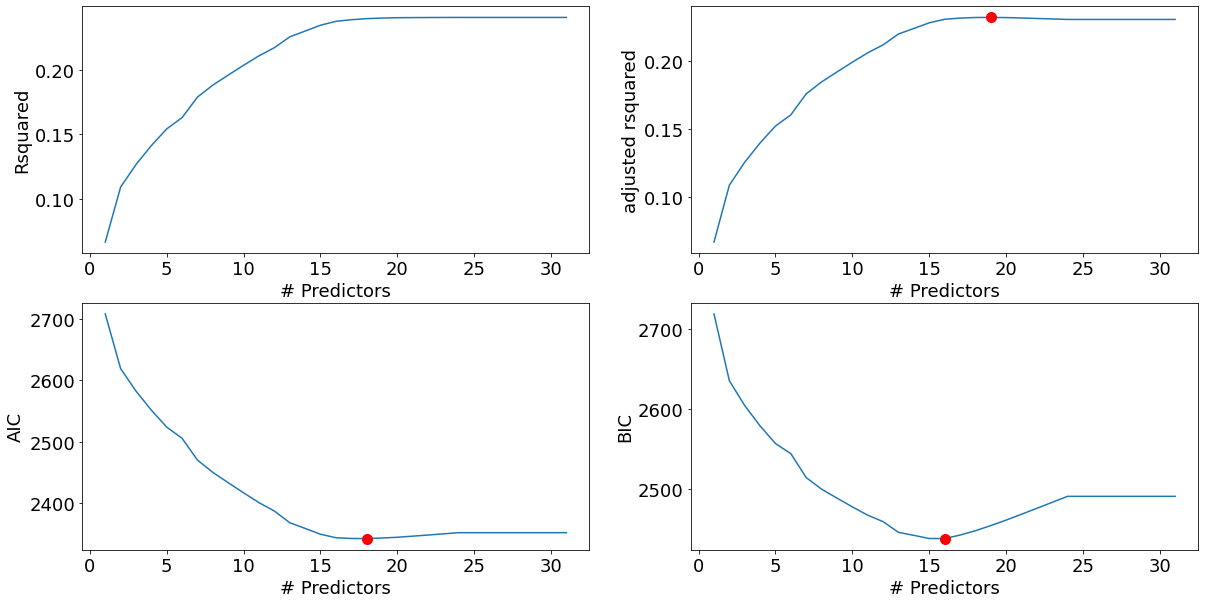

In [60]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [63]:
best_subset_model = models_best.loc[18,'model']
models_best.loc[18,'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Attrition_Yes   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     33.89
Date:                Thu, 02 Mar 2023   Prob (F-statistic):          1.53e-101
Time:                        13:27:02   Log-Likelihood:                -1151.9
No. Observations:                1956   AIC:                             2342.
Df Residuals:                    1937   BIC:                             2448.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.6865      0.094     17.957      0.000       1.502       1.871
JobLevel                    -0.0761      0.015     -4.997      0.000      -0.106      -0.046
StockOptionLevel            -0.1044      0.012     -8.891      0.000      -0.127      -0.081
JobInvolvement              -0.0778      0.014     -5.667      0.000      -0.105      -0.051
NumCompaniesWorked           0.0312      0.004      7.227      0.000       0.023       0.040
DistanceFromHome             0.0066      0.001      5.429      0.000       0.004       0.009
YearsInCurrentRole          -0.0288      0.005     -5.880      0.000      -0.038      -0.019
YearsSinceLastPromotion      0.0223      0.004      5.311      0.000       0.014       0.031
EnvironmentSatisfaction     -0.0442      0.009     -4.882      0.000      -0.062      -0.026
Age                         -0.0046      0.002     -3.032      0.002      -0.008      -0.002
JobSatisfaction             -0.0460      0.009     -5.139      0.000      -0.064      -0.028
WorkLifeBalance             -0.0576      0.014     -4.247      0.000      -0.084      -0.031
YearsAtCompany               0.0228      0.004      6.357      0.000       0.016       0.030
YearsWithCurrManager        -0.0232      0.005     -4.780      0.000      -0.033      -0.014
TotalWorkingYears           -0.0097      0.003     -3.347      0.001      -0.015      -0.004
TrainingTimesLastYear       -0.0266      0.008     -3.423      0.001      -0.042      -0.011
PercentSalaryHike           -0.0080      0.003     -2.892      0.004      -0.013      -0.003
RelationshipSatisfaction    -0.0168      0.009     -1.814      0.070      -0.035       0.001
DailyRate                 -3.66e-05    2.5e-05     -1.462      0.144   -8.57e-05    1.25e-05
==============================================================================
Omnibus:                      949.154   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.392
Skew:                          -0.046   Prob(JB):                     1.30e-23
Kurtosis:                       1.867   Cond. No.                     8.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""